# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("data/Breast_Cancer.csv")

dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
dataset.info

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

In [4]:
dataset = dataset.drop(['Unnamed: 32','id'],axis = 1)

In [5]:
dataset["diagnosis"].replace(to_replace = dict(M = 1, B = 0), inplace=True)

In [6]:
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
dataset['diagnosis'].unique()

array([1, 0], dtype=int64)

<AxesSubplot: xlabel='diagnosis'>

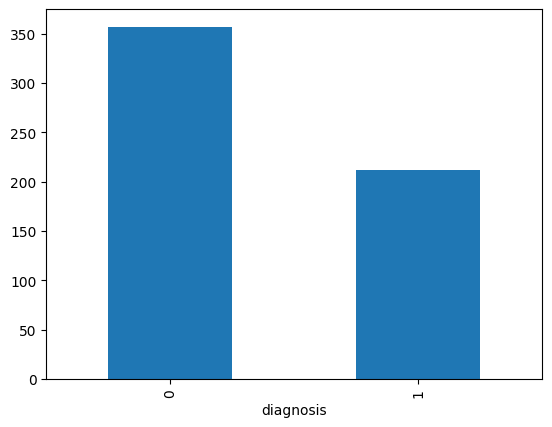

In [8]:
dataset.groupby('diagnosis')['diagnosis'].count().plot(kind='bar')

In [9]:
training_data = dataset.sample(frac=0.8, random_state=25)
testing_data = dataset.drop(training_data.index)

In [10]:
training_data.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
522,0,11.26,19.83,71.30,388.1,0.08511,0.04413,0.005067,0.005664,0.1637,...,11.93,26.43,76.38,435.9,0.1108,0.07723,0.02533,0.02832,0.2557,0.07613
120,0,11.41,10.82,73.34,403.3,0.09373,0.06685,0.035120,0.026230,0.1667,...,12.82,15.97,83.74,510.5,0.1548,0.23900,0.21020,0.08958,0.3016,0.08523
241,0,12.42,15.04,78.61,476.5,0.07926,0.03393,0.010530,0.011080,0.1546,...,13.20,20.37,83.85,543.4,0.1037,0.07776,0.06243,0.04052,0.2901,0.06783


In [11]:
training_data.shape

(455, 31)

In [12]:
testing_data.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
5,1,12.45,15.70,82.57,477.1,0.1278,0.1700,0.1578,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244
14,1,13.73,22.61,93.60,578.3,0.1131,0.2293,0.2128,0.08025,0.2069,...,15.03,32.01,108.8,697.7,0.1651,0.7725,0.6943,0.2208,0.3596,0.1431
17,1,16.13,20.68,108.10,798.8,0.1170,0.2022,0.1722,0.10280,0.2164,...,20.96,31.48,136.8,1315.0,0.1789,0.4233,0.4784,0.2073,0.3706,0.1142


In [13]:
testing_data.shape

(114, 31)

In [14]:
x_train = training_data.iloc[:, 1:]
x_test = testing_data.iloc[:, 1:]

In [15]:
x_train.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
522,11.26,19.83,71.30,388.1,0.08511,0.04413,0.005067,0.005664,0.1637,0.06343,...,11.93,26.43,76.38,435.9,0.1108,0.07723,0.02533,0.02832,0.2557,0.07613
120,11.41,10.82,73.34,403.3,0.09373,0.06685,0.035120,0.026230,0.1667,0.06113,...,12.82,15.97,83.74,510.5,0.1548,0.23900,0.21020,0.08958,0.3016,0.08523
241,12.42,15.04,78.61,476.5,0.07926,0.03393,0.010530,0.011080,0.1546,0.05754,...,13.20,20.37,83.85,543.4,0.1037,0.07776,0.06243,0.04052,0.2901,0.06783


In [16]:
x_test.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
5,12.45,15.70,82.57,477.1,0.1278,0.1700,0.1578,0.08089,0.2087,0.07613,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244
14,13.73,22.61,93.60,578.3,0.1131,0.2293,0.2128,0.08025,0.2069,0.07682,...,15.03,32.01,108.8,697.7,0.1651,0.7725,0.6943,0.2208,0.3596,0.1431
17,16.13,20.68,108.10,798.8,0.1170,0.2022,0.1722,0.10280,0.2164,0.07356,...,20.96,31.48,136.8,1315.0,0.1789,0.4233,0.4784,0.2073,0.3706,0.1142


In [17]:
y_train = training_data["diagnosis"]
y_test = testing_data["diagnosis"]

In [18]:
y_train.head(3)

522    0
120    0
241    0
Name: diagnosis, dtype: int64

In [19]:
y_test.head(3)

5     1
14    1
17    1
Name: diagnosis, dtype: int64

In [20]:
class LogisticRegression:
    
    def __init__(self, learning_rate=0.00008, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.width = None
        self.bias = None
    
    def fit(self, x_train, y_train):
        
        cost_list = []
        
        n_samples, n_features = x_train.shape
        
        # init parameters
        self.weights = np.zeros(n_features)
        
        self.bias = 0
        
        # gradient descent
        for _ in range(self.iterations):
            
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(x_train, self.weights) + self.bias
            
            # apply sigmoid function
            y_predicted = self.sigmoid_function(linear_model)
            
            cost = -(1 / n_samples) * np.sum((y_train * np.log(y_predicted)) + ((1 - y_train) * np.log(1 - y_predicted)))
            
            # compute gradients
            dw = (1 / n_samples) * np.dot(x_train.T, (y_predicted - y_train))
            db = (1 / n_samples) * np.sum(y_predicted - y_train)
            
            # update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            cost_list.append(cost)
        
        return cost_list
    
    def predict(self, x_test):
        linear_model = np.dot(x_test, self.weights) + self.bias
        y_predicted = self.sigmoid_function(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)
    
    def accuracy(self, y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        print(f"LR classification accuracy: {accuracy}%")
        return accuracy
    
    def sigmoid_function(self, x):
        return 1 / (1 + np.exp(-x))

In [21]:
LR = LogisticRegression(iterations=1000)

cost_list = LR.fit(x_test, y_test)

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_5256\1307615070.py:29: RuntimeWarning: divide by zero encountered in log
  cost = -(1 / n_samples) * np.sum((y_train * np.log(y_predicted)) + ((1 - y_train) * np.log(1 - y_predicted)))


In [22]:
predictions = LR.predict(x_test)
predictions

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1])

In [23]:
accuracy = LR.accuracy(y_test, predictions)

LR classification accuracy: 0.9473684210526315%


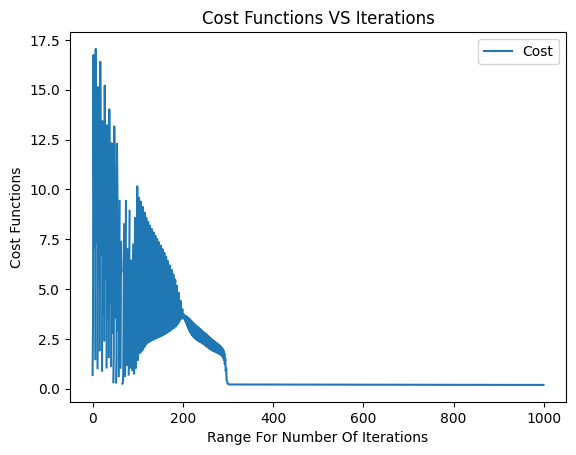

In [24]:
indexs_x = np.arange(0, LR.iterations)

plt.plot(indexs_x, cost_list, label='Cost')

plt.title("Cost Functions VS Iterations")
plt.xlabel("Range For Number Of Iterations")
plt.ylabel("Cost Functions")
plt.legend()

plt.show()